Task-1:- Image Stitching, Panorama stitching, Structure from motion, Image Inpainting.


Image Inpainting

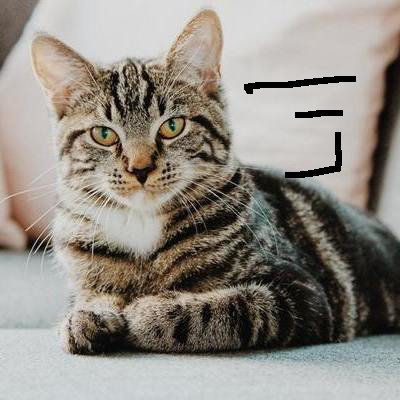

Original Damaged Image


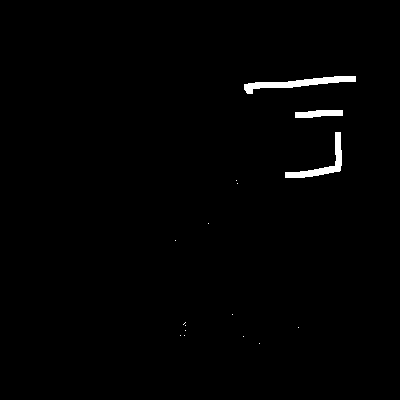

Generated Mask


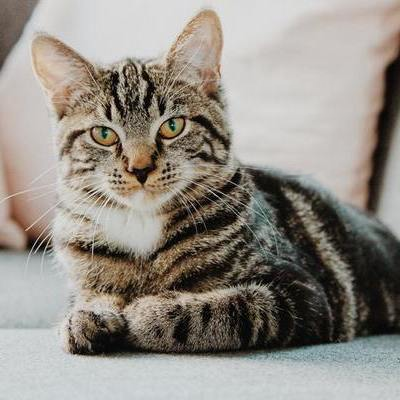

Inpainted Image


True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


damaged_img = cv2.imread('/content/download.jpg')
cv2_imshow(damaged_img)
print("Original Damaged Image")


height, width = damaged_img.shape[:2]
mask = np.zeros((height, width), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            mask[i, j] = 0
        else:
            mask[i, j] = 255

cv2_imshow(mask)
print("Generated Mask")


inpainted_img = cv2.inpaint(damaged_img, mask, 3, cv2.INPAINT_NS)

cv2_imshow(inpainted_img)
print("Inpainted Image")


cv2.imwrite('/content/mask.jpg', mask)
cv2.imwrite('/content/cat_inpainted.png', inpainted_img)


Image Stitching & Panorama stitching

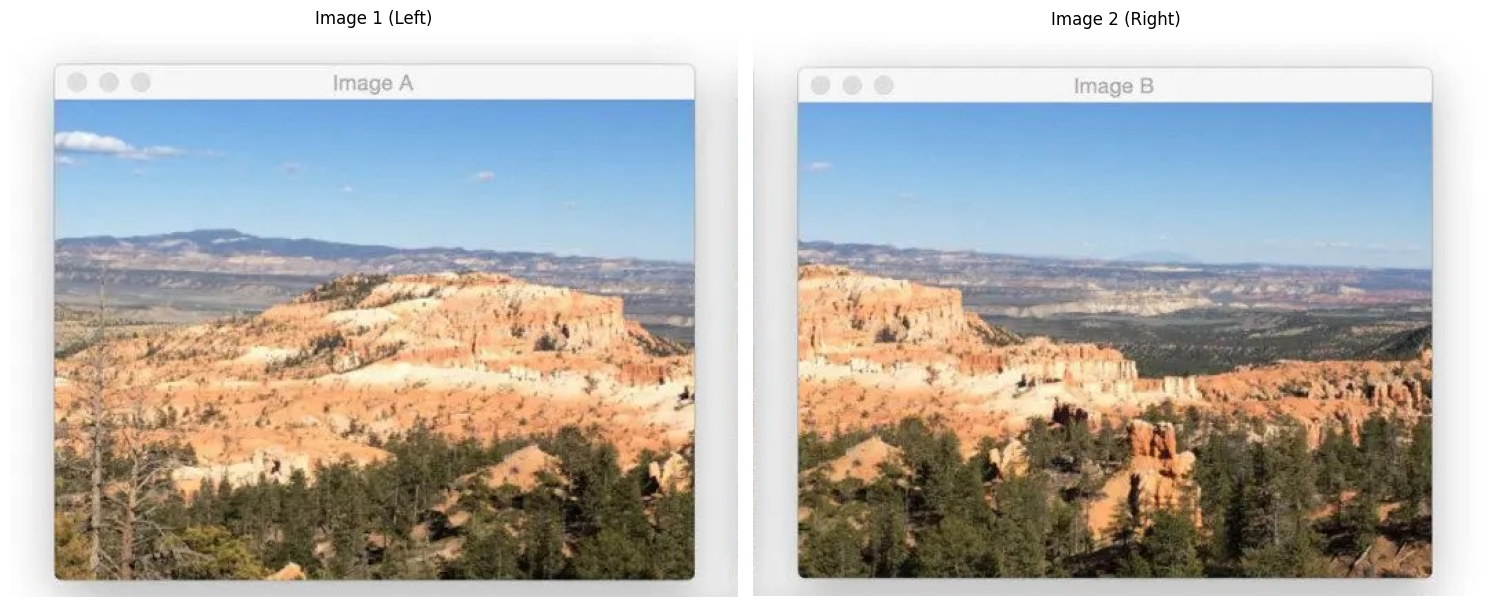

✅ Stitching successful!


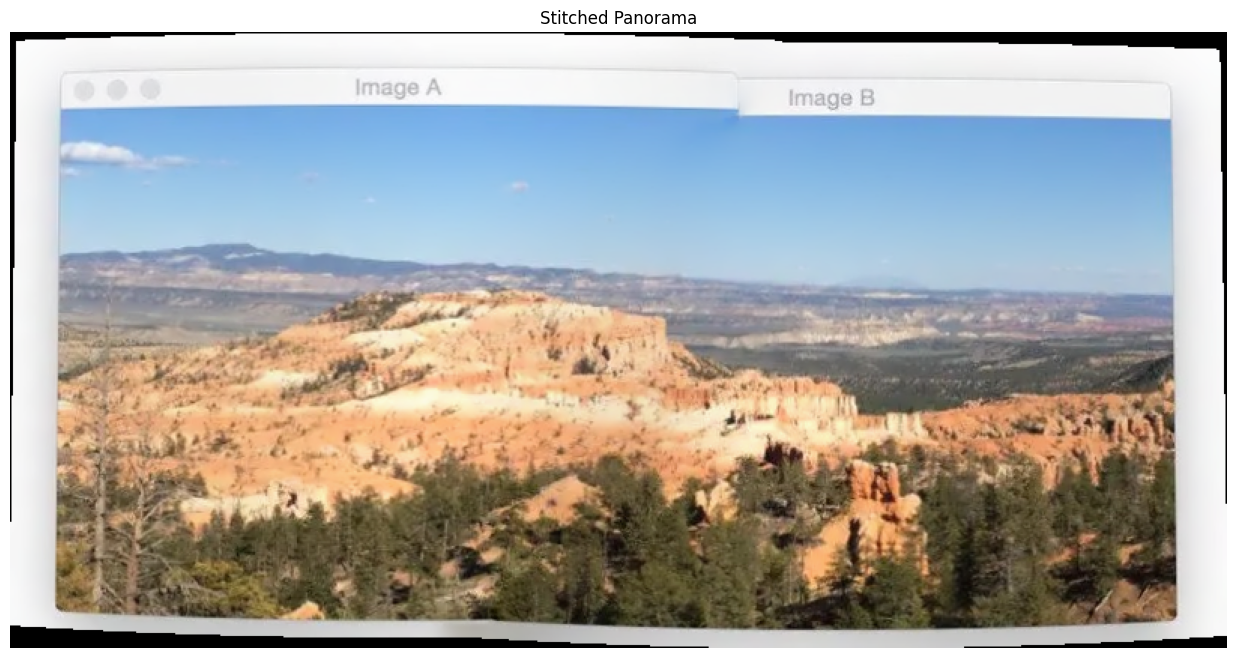

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img1 = cv2.imread("/content/stitch_01.jpg")
img2 = cv2.imread("/content/stitch_02.jpg")


img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.title("Image 1 (Left)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_rgb)
plt.title("Image 2 (Right)")
plt.axis("off")

plt.tight_layout()
plt.show()


stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([img1, img2])


if status == cv2.Stitcher_OK:
    print("✅ Stitching successful!")
    stitched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(18, 8))
    plt.imshow(stitched_rgb)
    plt.title("Stitched Panorama")
    plt.axis("off")
    plt.show()
else:
    print(f"❌ Stitching failed with status code: {status}")


Structure from motion

Estimated Rotation:
 [[ 0.88103502 -0.14287377 -0.45095939]
 [ 0.1430416   0.98913522 -0.03392061]
 [ 0.45090618 -0.03462071  0.89189967]]
Estimated Translation:
 [[0.95849531]
 [0.08053958]
 [0.27349609]]


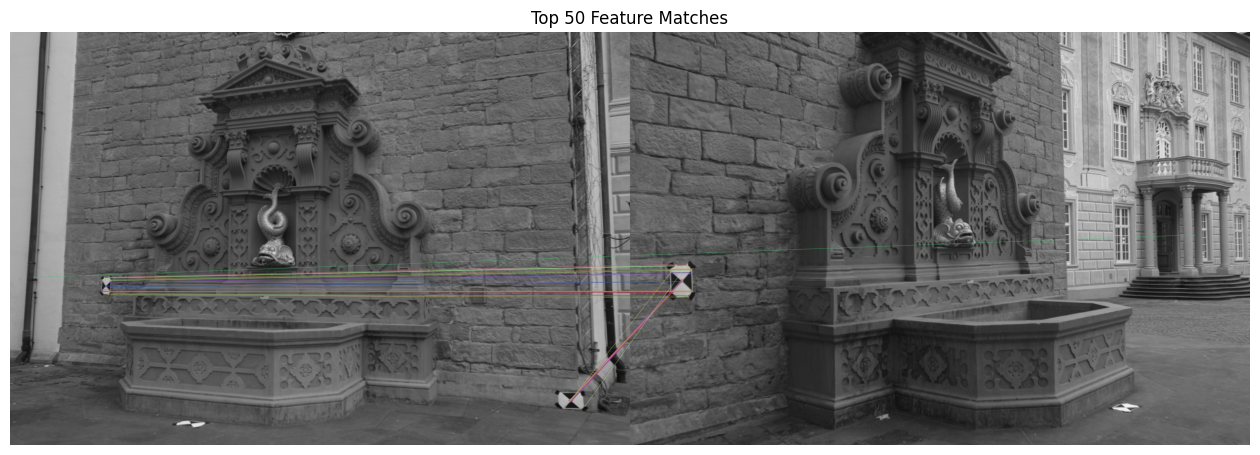

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1 = cv2.imread("/content/0003.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/0009.jpg", cv2.IMREAD_GRAYSCALE)


orb = cv2.ORB_create(5000)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)


pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])


F, mask_F = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)


K = np.array([[800, 0, img1.shape[1]//2],
              [0, 800, img1.shape[0]//2],
              [0, 0, 1]])


E, mask_E = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, threshold=1.0)


_, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)

print("Estimated Rotation:\n", R)
print("Estimated Translation:\n", t)


img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)


plt.figure(figsize=(16, 8))
plt.imshow(img_matches)
plt.title("Top 50 Feature Matches")
plt.axis("off")
plt.show()


Image Restoration using Autoencoder

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.1070 - val_loss: 0.1028
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1008 - val_loss: 0.1028
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1008 - val_loss: 0.1028
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1008 - val_loss: 0.1028
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1008 - val_loss: 0.1028
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1006 - val_loss: 0.1028
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1009 - val_loss: 0.1028
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1008 - val_loss: 0.1028
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1006 - val_loss: 0.1028
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1006 - val_loss: 0.1028
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1007 - val_loss: 0.1028

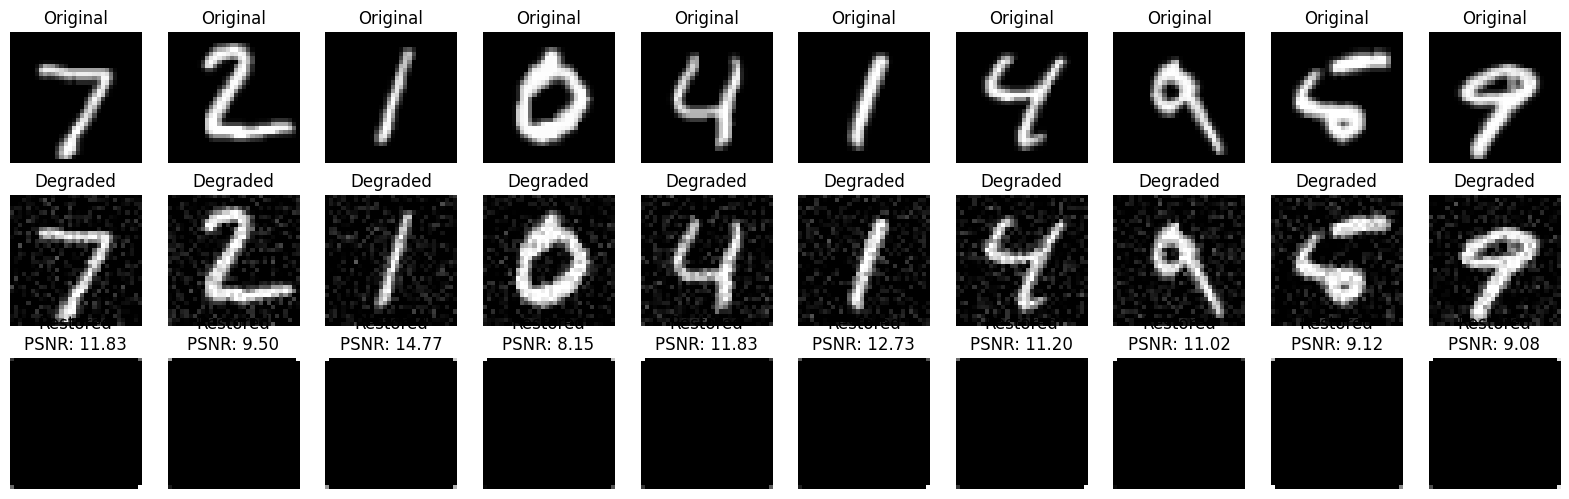

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist, cifar10


def load_and_preprocess_data(dataset='mnist', img_size=32):
    if dataset == 'mnist':
        (x_train, _), (x_test, _) = mnist.load_data()
        x_train = np.expand_dims(x_train, -1)
        x_test = np.expand_dims(x_test, -1)
    elif dataset == 'cifar10':
        (x_train, _), (x_test, _) = cifar10.load_data()


    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.


    if x_train.shape[1] != img_size:
        x_train = tf.image.resize(x_train, [img_size, img_size]).numpy()
        x_test = tf.image.resize(x_test, [img_size, img_size]).numpy()


    if dataset == 'cifar10' and x_train.shape[-1] == 3:
        x_train = tf.image.rgb_to_grayscale(x_train).numpy()
        x_test = tf.image.rgb_to_grayscale(x_test).numpy()

    return x_train, x_test

x_train, x_test = load_and_preprocess_data('mnist', 32)


def degrade_images(images, noise_type='gaussian'):
    degraded = images.copy()
    if noise_type == 'gaussian':
        noise = np.random.normal(0, 0.1, size=images.shape)
        degraded = np.clip(degraded + noise, 0, 1)
    elif noise_type == 'salt_pepper':
        salt_pepper_ratio = 0.05
        amount = salt_pepper_ratio / 2

        num_salt = np.ceil(amount * images.size)
        coords = [np.random.randint(0, i-1, int(num_salt)) for i in images.shape]
        degraded[tuple(coords)] = 1

        num_pepper = np.ceil(amount * images.size)
        coords = [np.random.randint(0, i-1, int(num_pepper)) for i in images.shape]
        degraded[tuple(coords)] = 0
    return degraded

x_train_degraded = degrade_images(x_train)
x_test_degraded = degrade_images(x_test)


def build_autoencoder(input_shape=(32, 32, 1)):
    inputs = keras.Input(shape=input_shape)


    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return keras.Model(inputs, decoded)

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')


history = autoencoder.fit(
    x_train_degraded, x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_degraded, x_test)
)


def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

restored_test = autoencoder.predict(x_test_degraded)


n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')


    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_degraded[i].squeeze(), cmap='gray')
    plt.title("Degraded")
    plt.axis('off')


    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(restored_test[i].squeeze(), cmap='gray')
    psnr = calculate_psnr(x_test[i], restored_test[i])
    plt.title(f"Restored\nPSNR: {psnr:.2f}")
    plt.axis('off')
plt.show()

Generative adversarial networks on MNIST and Cifar-10 datasets

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training MNIST GAN...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - d_loss: 0.5794 - g_loss: 0.8820
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - d_loss: 0.6119 - g_loss: 0.9612
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - d_loss: 0.6231 - g_loss: 0.9299
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - d_loss: 0.6432 - g_loss: 0.8898
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - d_loss: 0.6499 - g_loss: 0.8698
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - d_loss: 0.6396 - g_loss: 0.8880
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - d_loss: 0.6302 - g_loss: 0.8951
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - d_loss: 0.6237 - g_loss: 0.9101
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - d_loss: 0.6164 - g_loss: 0.9239
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - d_loss: 0.6104 - g_loss: 0.9472
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - d_loss: 0.6030 - g_loss: 0.9350
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 

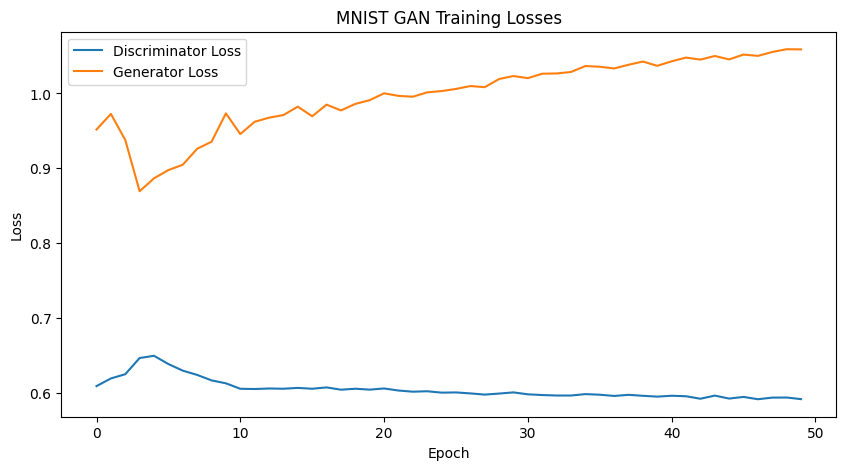

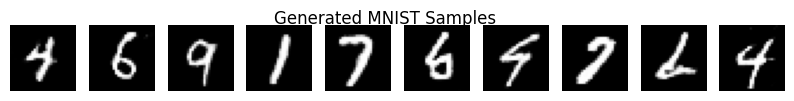

Training CIFAR-10 GAN...
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - d_loss: 0.5593 - g_loss: 1.0595
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - d_loss: 0.6408 - g_loss: 0.9670
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - d_loss: 0.6813 - g_loss: 0.9507
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - d_loss: 0.6781 - g_loss: 0.8599
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - d_loss: 0.6735 - g_loss: 0.9426
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - d_loss: 0.6541 - g_loss: 0.9235
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - d_loss: 0.6641 - g_loss: 0.9259
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - d_loss: 0.6693 - g_loss: 0.9169
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - d_loss: 0.6598 - g_loss: 0.9433
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - d_loss: 0.6629 - g_loss: 0.9931
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - d_loss: 0.6601 - g_loss: 0.9716
Epoch

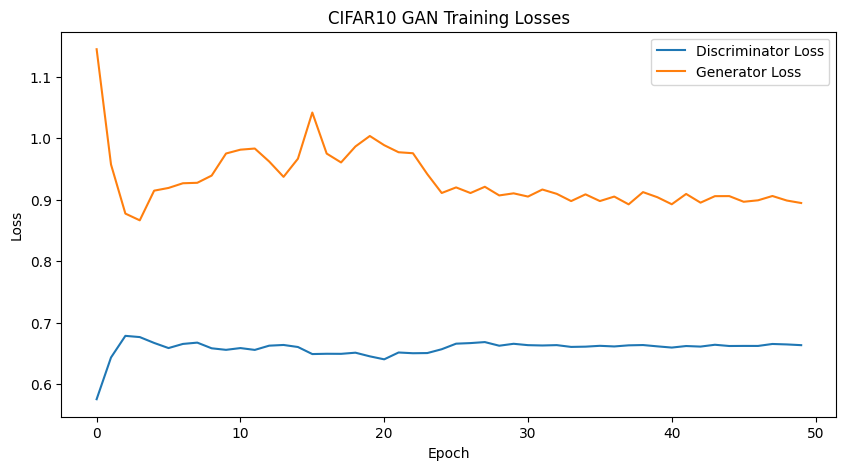

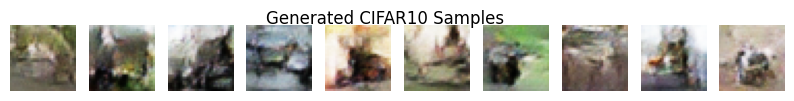

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10


(x_train_mnist, _), (_, _) = mnist.load_data()
(x_train_cifar, _), (_, _) = cifar10.load_data()


def preprocess_data(x, dataset):
    x = x.astype('float32') / 255.
    if dataset == 'mnist':
        x = np.expand_dims(x, -1)
    return x

x_train_mnist = preprocess_data(x_train_mnist, 'mnist')
x_train_cifar = preprocess_data(x_train_cifar, 'cifar10')


def build_generator(latent_dim, img_shape):
    model = keras.Sequential()

    if img_shape[0] == 28:
        model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_dim=latent_dim))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Reshape((7, 7, 256)))
        model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    else:
        model.add(layers.Dense(8 * 8 * 256, use_bias=False, input_dim=latent_dim))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Reshape((8, 8, 256)))
        model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

def build_discriminator(img_shape):
    model = keras.Sequential()

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]


        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        generated_images = self.generator(random_latent_vectors)

        combined_images = tf.concat([generated_images, real_images], axis=0)
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))


        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        misleading_labels = tf.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

def train_gan(dataset, img_shape, latent_dim=128, epochs=50, batch_size=128):

    if dataset == 'mnist':
        (x_train, _), (_, _) = mnist.load_data()
        x_train = np.expand_dims(x_train, -1).astype('float32') / 255.
        x_train = x_train * 2 - 1
    else:
        (x_train, _), (_, _) = cifar10.load_data()
        x_train = x_train.astype('float32') / 255.
        x_train = x_train * 2 - 1

    train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000).batch(batch_size)


    generator = build_generator(latent_dim, img_shape)
    discriminator = build_discriminator(img_shape)


    gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
    gan.compile(
        d_optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
        g_optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
        loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
    )


    history = gan.fit(train_dataset, epochs=epochs)


    plt.figure(figsize=(10, 5))
    plt.plot(history.history['d_loss'], label='Discriminator Loss')
    plt.plot(history.history['g_loss'], label='Generator Loss')
    plt.title(f'{dataset.upper()} GAN Training Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    latent_vectors = tf.random.normal(shape=(10, latent_dim))
    generated_images = generator(latent_vectors)
    generated_images = (generated_images + 1) / 2

    plt.figure(figsize=(10, 1))
    for i in range(10):
        ax = plt.subplot(1, 10, i + 1)
        if img_shape[-1] == 1:
            plt.imshow(generated_images[i].numpy().squeeze(), cmap='gray')
        else:
            plt.imshow(generated_images[i].numpy())
        plt.axis('off')
    plt.suptitle(f'Generated {dataset.upper()} Samples')
    plt.show()

    return generator, discriminator, history


print("Training MNIST GAN...")
mnist_generator, mnist_discriminator, mnist_history = train_gan(
    'mnist', img_shape=(28, 28, 1), epochs=50
)


print("Training CIFAR-10 GAN...")
cifar_generator, cifar_discriminator, cifar_history = train_gan(
    'cifar10', img_shape=(32, 32, 3), epochs=50
)